In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Sunayana Panigrahi\Downloads\archive (4)\Titanic-Dataset.csv")

In [5]:
# Dataset info
print(df.info())

# Statistical description
print(df.describe())

# Count of unique values in target column
print(df['Survived'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

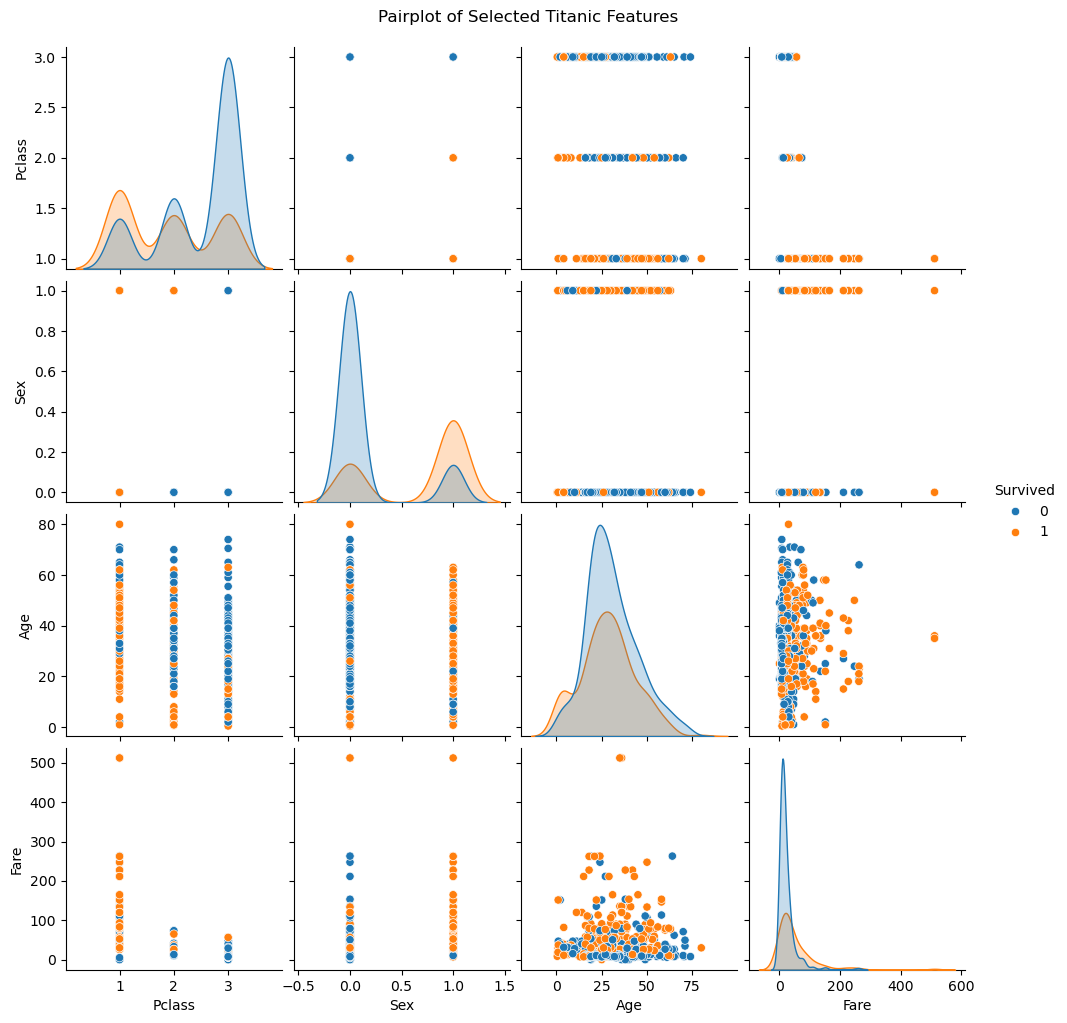

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few important features
selected_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_viz = df[selected_cols].dropna()

# Convert 'Sex' to numeric for pairplot
df_viz['Sex'] = df_viz['Sex'].map({'male': 0, 'female': 1})

# Plot pairplot
sns.pairplot(df_viz, hue='Survived')
plt.suptitle('Pairplot of Selected Titanic Features', y=1.02)
plt.show()

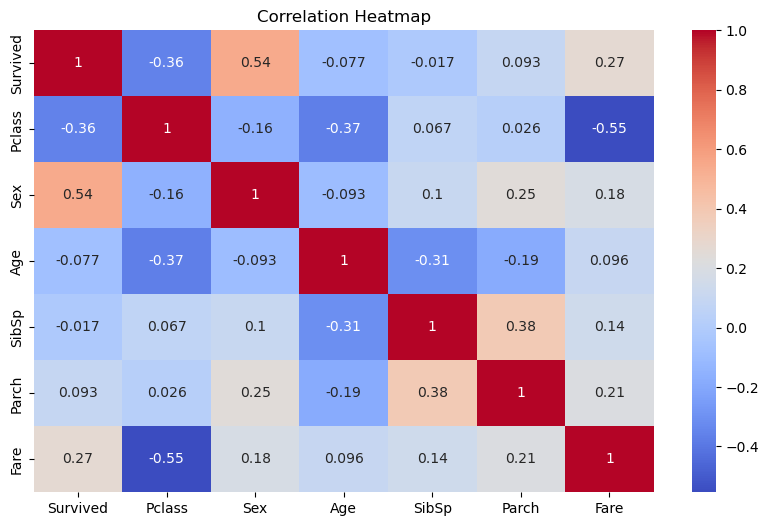

In [7]:
# Convert categorical columns for correlation analysis
df_corr = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})

# Drop missing values
df_corr.dropna(inplace=True)

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

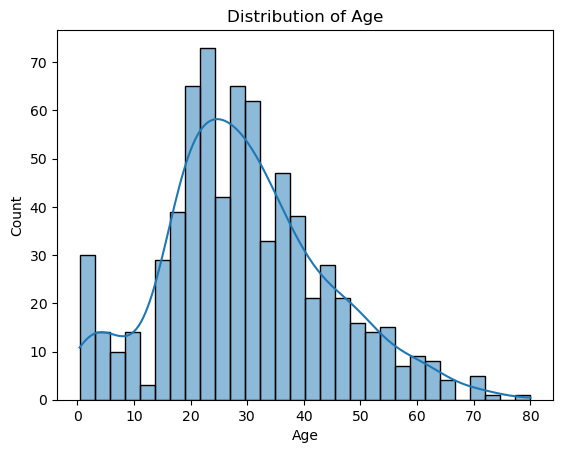

In [8]:
# Histogram of Age
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

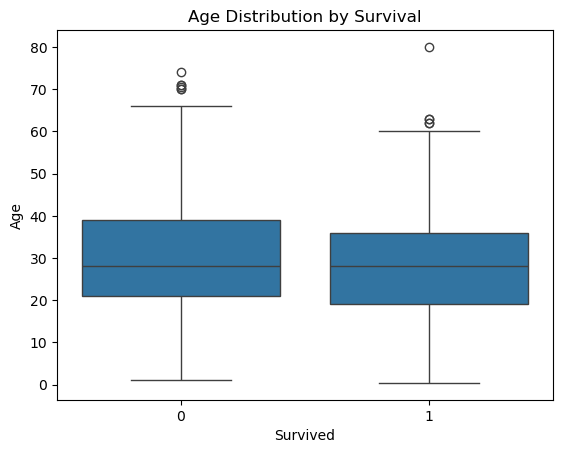

In [9]:
# Boxplot of Age by Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

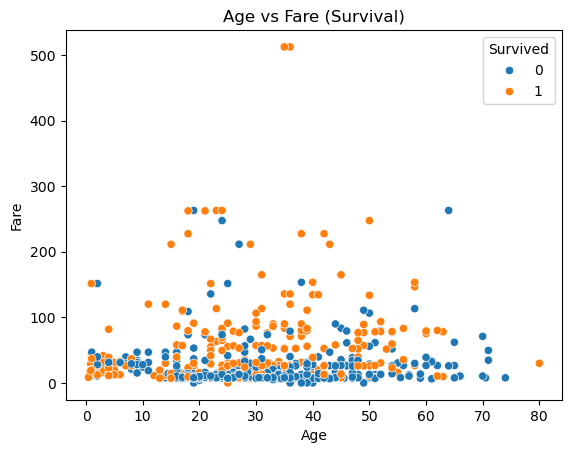

In [10]:
# Scatterplot: Age vs Fare with survival hue
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare (Survival)')
plt.show()

# Titanic Dataset Insights Summary

1. *Missing Data*: Age and Cabin contain missing values. Cabin is highly sparse.
2. *Survival Rate*: ~38% survived, ~62% did not.
3. *Key Influencers*:
   - *Gender*: Females had significantly higher survival rates.
   - *Fare*: Passengers who paid more had better chances of survival.
   - *Class*: 1st class passengers were more likely to survive.
4. *Age*: Younger passengers had a higher survival probability.
5. *Visuals*:
   - Pairplots show distinct clusters by gender and survival.
   - Heatmap confirms moderate to strong correlation of Sex and Fare with survival.
6. *Overall*: Women, wealthy, and younger passengers had higher chances of survival.